In [1]:
using Distributions
using StatsBase
using Statistics
using Plots

## 2.1 例題 : 種子数の統計モデリング
### 種子数データ    

In [2]:
data = [2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3,4, 2, 7, 2, 4, 3, 3, 3, 4,
        3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7, 2, 2, 6, 2, 4, 5, 4, 5, 1, 3, 2, 3]
print(data)

[2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3, 4, 2, 7, 2, 4, 3, 3, 3, 4, 3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7, 2, 2, 6, 2, 4, 5, 4, 5, 1, 3, 2, 3]

### データ数

In [3]:
length(data)

50

### データの要約

In [4]:
describe(data)

Summary Stats:
Mean:           3.560000
Minimum:        0.000000
1st Quartile:   2.000000
Median:         3.000000
3rd Quartile:   4.750000
Maximum:        7.000000
Length:         50
Type:           Int64


### 度数分布

In [5]:
sort(countmap(data))

OrderedCollections.OrderedDict{Int64,Int64} with 8 entries:
  0 => 1
  1 => 3
  2 => 11
  3 => 12
  4 => 10
  5 => 5
  6 => 4
  7 => 4

### ヒストグラム

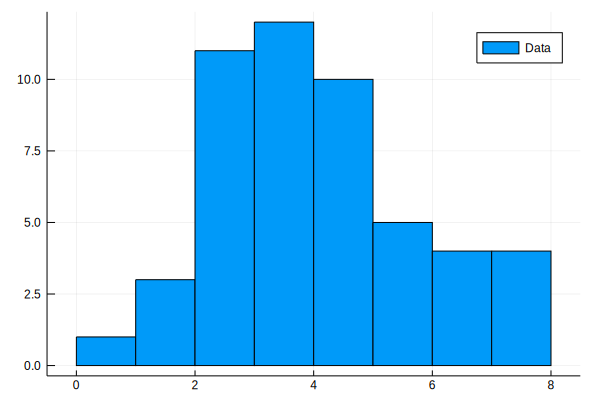

In [6]:
histogram(data, bins=10, label="Data")

### 標本分散

In [7]:
var(data)

2.9861224489795917

### 標本標準偏差

In [8]:
std(data)

1.728040060004279

## 2.2 データと確率分布の対応関係をながめる
### ポアソン分布

In [9]:
y = 0:9
prob = pdf.(Poisson(3.56), y)

10-element Array{Float64,1}:
 0.028438824714184505 
 0.10124221598249684  
 0.18021114444884437  
 0.21385055807929534  
 0.19032699669057287  
 0.1355128216436879   
 0.08040427417525477  
 0.04089131658055819  
 0.018196635878348365 
 0.0071977804141022395

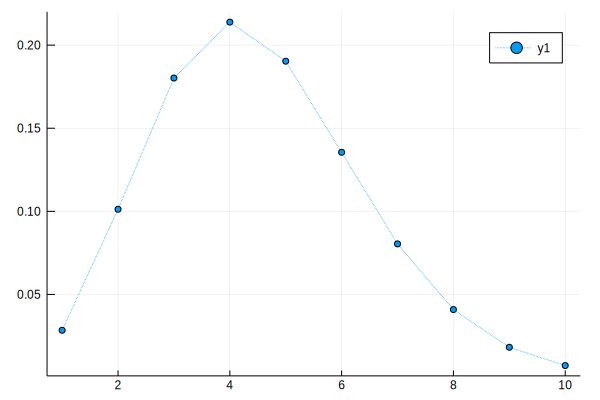

In [10]:
plot(prob, linestyle=:dot, marker=3)

### 観測データと確率分布の対応

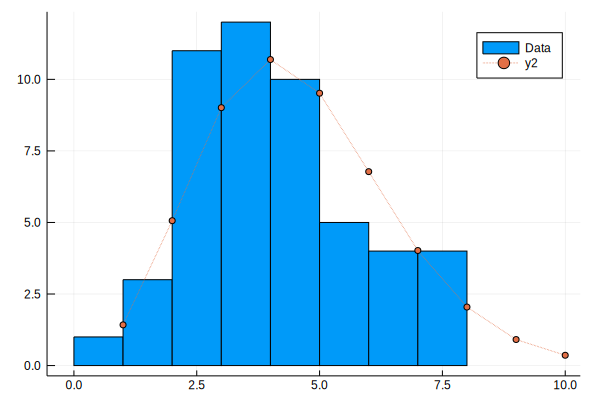

In [11]:
histogram(data, bins=10, label="Data")
plot!(prob * 50, linestyle=:dot, marker=3)

## 2.4 ポアソン分布のパラメーターの最尤推定
### 対数尤度 $\log L(\lambda)$と$\lambda$の関係

In [12]:
function logL(m)
    sum(log.(pdf.(Poisson(m), data)))
end

logL (generic function with 1 method)

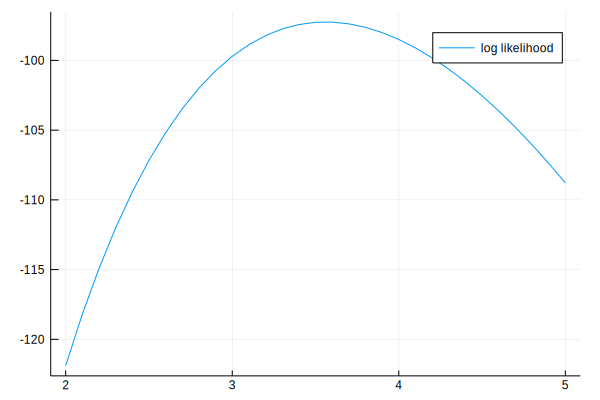

In [13]:
lambda = 2:0.1:5
plot(lambda, logL.(lambda), label="log likelihood")